
# Digital Signalprocessing in Python

# Session 1: Basics

## 1. Properties of speech signals

**Task 1:** Import the file speech.wav as a numpy array. What sampling rate does the signal have? Play it with the correct sampling rate via the sound card.

In [1]:
import soundfile as sf
# your code here
data, sr = sf.read('C:\\Users\\oğuz\\Desktop\\Lab Assignment 01\\speech.wav')
print("Sampling rate of the signal is", sr, "Hz")

Sampling rate of the signal is 16000 Hz


In [22]:
#import sounddevice as sd
#your code here
#sd.play(data, sr)
#status = sd.wait()

import numpy as np
import soundcard as sc

# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()

default_speaker.play(data/np.max(data), samplerate=sr)

**Task 2:** Extract a section of 8000 samples starting from sample 5500 and plot it so that the x-axis shows the time instead of the index.

Text(0.5, 1.0, '8000 samples')

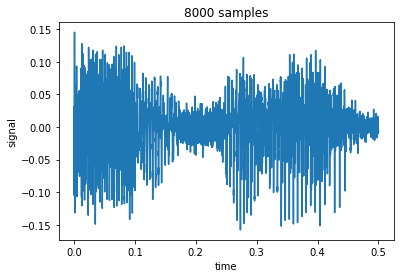

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# your code here
sect = data[5500:(5500+8000)]
len(sect)
t = np.arange(0, 8000/sr, 1/sr)

plt.plot(t,sect)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('8000 samples')
#plt.axis([0, fs/2, 0, 1.1])

**Task 3:** Determine minimum and maximum as well as arithmetic mean $\bar{x}$ and squared mean (mean value of $x^2$)
of the entire speech signal.

In [4]:
# your code here
minimum = np.min(data)
maximum = np.max(data)
mean = np.mean(data)
sqr_mean = np.mean(np.square(data))
print("Minimum of the entire speech signal is", minimum)
print("Maximum of the entire speech signal is", maximum)
print("Arithmetic mean of the entire speech signal is", mean)
print("Squared mean of the entire speech signal is", sqr_mean)

Minimum of the entire speech signal is -0.213653564453125
Maximum of the entire speech signal is 0.182708740234375
Arithmetic mean of the entire speech signal is -9.453816447912655e-06
Squared mean of the entire speech signal is 0.0012842047270392248


**Task 4:** Generate a histogram of the speech signal using the function $\texttt{plt.hist}$. Set the parameters
so that you receive a plot that covers the value range from $-0.25$ to $+0.25$ with a resolution of $1/500$.

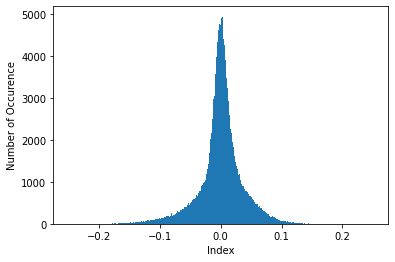

In [5]:
# your code here
plt.hist(data,500,range = (-0.25,0.25))
plt.xlabel('Index')
plt.ylabel('Number of Occurence')
plt.show()
#plt.xlim(-3, 3)


**Task 5:** Generate random signals with the same length as the speech signal with each of the functions
$\texttt{np.random.rand}$, $\texttt{np.random.randn}$ and the unknown function $\texttt{randg}$ that has been imported. Note that $\texttt{randg}$ takes a few seconds.
	
Generate seperate histograms with the same settings as for the speech signal for all of these random signals.
Modify the value range of the histogram so that it covers the entire signal by making use of the command
$\texttt{np.min}$ and $\texttt{np.max}$. What is the distribution of the different noise signals? What distribution can
the speech signal best be described by?

In [6]:
# your code here

#import randg as randg
from randg import randg

rand_sig1 = randg(len(data))
rand_sig2 = 𝚗𝚙.𝚛𝚊𝚗𝚍𝚘𝚖.𝚛𝚊𝚗𝚍(len(data))
rand_sig3 = 𝚗𝚙.𝚛𝚊𝚗𝚍𝚘𝚖.𝚛𝚊𝚗𝚍𝚗(len(data))


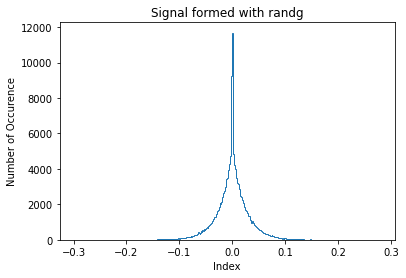

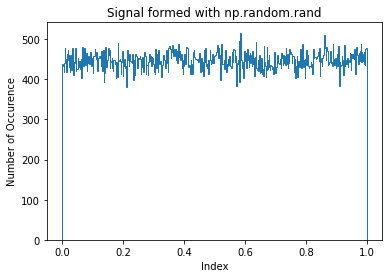

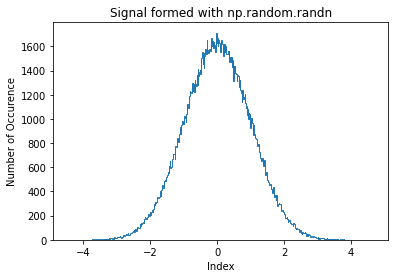

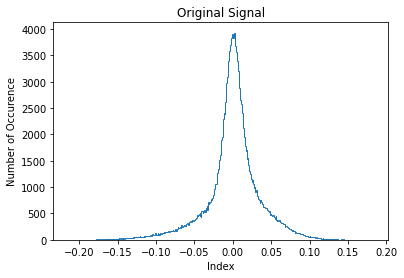

In [7]:
#signal 1 histogram
plt.hist(rand_sig1,500,histtype = "step",range = (𝚗𝚙.𝚖𝚒𝚗(rand_sig1),np.max(rand_sig1)))
plt.title("Signal formed with randg")
plt.xlabel('Index')
plt.ylabel('Number of Occurence') 
plt.show()

#signal 2 histogram
plt.hist(rand_sig2,500,histtype = "step",range = (𝚗𝚙.𝚖𝚒𝚗(rand_sig2),np.max(rand_sig2)))
plt.title("Signal formed with np.random.rand")
plt.xlabel('Index')
plt.ylabel('Number of Occurence')
plt.show()

#signal 3 histogram
plt.hist(rand_sig3,500,histtype = "step",range = (𝚗𝚙.𝚖𝚒𝚗(rand_sig3),np.max(rand_sig3)))
plt.title("Signal formed with np.random.randn")
plt.xlabel('Index')
plt.ylabel('Number of Occurence')
plt.show()

#original signal histogram
plt.hist(data,500,histtype = "step",range = (𝚗𝚙.𝚖𝚒𝚗(data),np.max(data)))
plt.title("Original Signal")
plt.xlabel('Index')
plt.ylabel('Number of Occurence')
plt.show()

## 2. Quantization

**Task 1:** Normalize the input signal to the value range [−1,1] and perform a uniform quanitzation of the speech signal
from the previous exercise with 8, 6 and 4 bit precision, i. e. 256, 64 and 16 valid steps. The input values are 
rounded to the closest quantization level in the process. The value range of the quantizer is assumed to be limited to 
[−1,1]. The quantizer characteristic should be analogous to Figure 1.11.

In [8]:
# your code here
data_normalized = 2*(data-minimum)/(maximum-minimum)-1

#normalising_factor = max(abs(max(data)),abs(min(data)))
#data_normalized = data/normalising_factor

N_bit_4 = 4
step_size_4 = (1-(-1))/(2**N_bit_4)
#data_quantized_4 = np.round(data_normalized/step_size_4)
data_quantized_4 = np.round(data_normalized/step_size_4)*step_size_4

N_bit_6 = 6
step_size_6 = (1-(-1))/(2**N_bit_6)
#data_quantized_6 = np.round(data_normalized/step_size_6)
data_quantized_6 = np.round(data_normalized/step_size_6)*step_size_6

N_bit_8 = 8
step_size_8 = (1-(-1))/(2**N_bit_8)
#data_quantized_8 = np.round(data_normalized/step_size_8)
data_quantized_8 = np.round(data_normalized/step_size_8)*step_size_8

#data_quantized_4 = np.round(data_normalized*8)/8
#data_quantized_6 = np.round(data_normalized*32)/32
#data_quantized_8 = np.round(data_normalized*128)/128

**Task 2:** Listen to the quantized signals.

In [9]:
default_speaker.play(data_quantized_4/np.max(data_quantized_4), samplerate=sr)

**Task 3:** Plot a section of 500 samples from the original signal and the three quantized signals in a diagram. The 
selected signal segment should be one where there is “a lot going on”. Use the function $\texttt{plt.step}$ for the quantized signal 
segments.

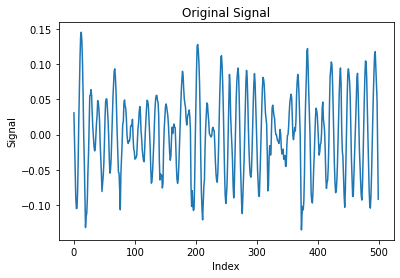

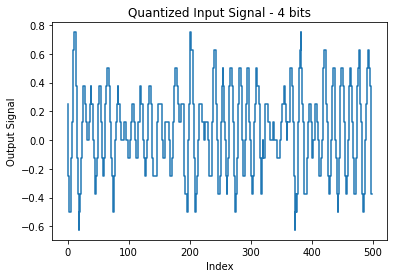

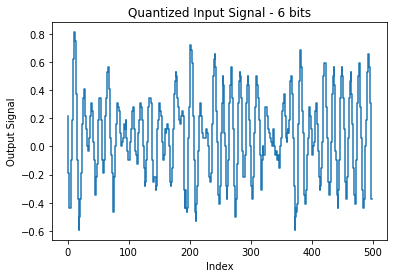

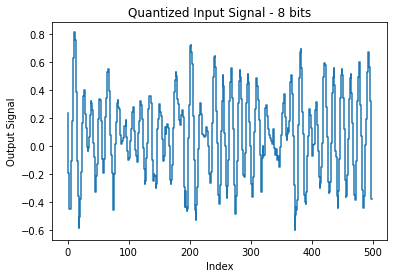

In [10]:
# your code here
plt.plot(np.arange(500),data[5500:6000])
plt.title("Original Signal")
plt.xlabel('Index')
plt.ylabel('Signal')
plt.show()

plt.step(np.arange(500),data_quantized_4[5500:6000])
plt.title("Quantized Input Signal - 4 bits")
plt.xlabel('Index')
plt.ylabel('Output Signal')
plt.show()

plt.step(np.arange(500),data_quantized_6[5500:6000])
plt.title("Quantized Input Signal - 6 bits")
plt.xlabel('Index')
plt.ylabel('Output Signal')
plt.show()

plt.step(np.arange(500),data_quantized_8[5500:6000])
plt.title("Quantized Input Signal - 8 bits")
plt.xlabel('Index')
plt.ylabel('Output Signal')
plt.show()

**Task 4:** Determine the error signal for the three quantized signals for the entire length of the signals

In [11]:
# your code here
error_4 = data_quantized_4 - data_normalized
error_6 = data_quantized_6 - data_normalized
error_8 = data_quantized_8 - data_normalized

**Task 5:** Generate histograms for the error signals. Plot them together with the histogram of the original signal
in a single diagram. What do you notice?

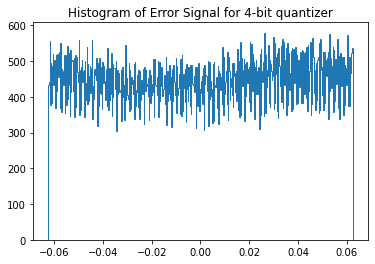

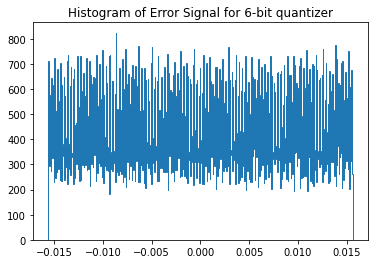

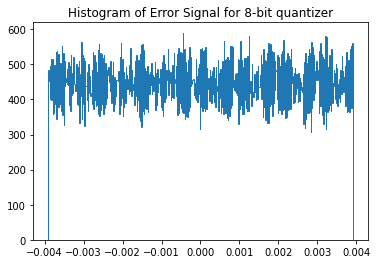

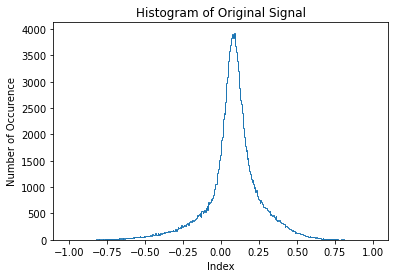

In [12]:
# your code here
plt.hist(error_4,500,histtype = "step",range = (np.min(error_4),np.max(error_4)))
plt.title("Histogram of Error Signal for 4-bit quantizer")
plt.show()

plt.hist(error_6,500,histtype = "step",range = (np.min(error_6),np.max(error_6)))
plt.title("Histogram of Error Signal for 6-bit quantizer")
plt.show()

plt.hist(error_8,500,histtype = "step",range = (np.min(error_8),np.max(error_8)))
plt.title("Histogram of Error Signal for 8-bit quantizer")
plt.show()

plt.hist(data_normalized,500,histtype = "step",range = (np.min(data_normalized),np.max(data_normalized)))
plt.title("Histogram of Original Signal")
plt.xlabel('Index')
plt.ylabel('Number of Occurence')
plt.show()

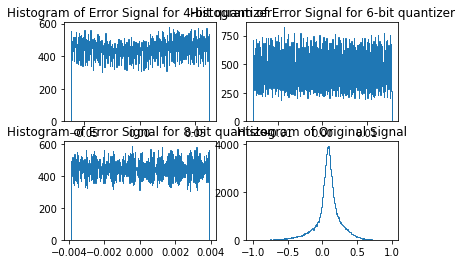

In [13]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].hist(error_4,500,histtype = "step",range = (np.min(error_4),np.max(error_4)))
axis[0, 0].set_title("Histogram of Error Signal for 4-bit quantizer")
  
axis[0, 1].hist(error_6,500,histtype = "step",range = (np.min(error_6),np.max(error_6)))
axis[0, 1].set_title("Histogram of Error Signal for 6-bit quantizer")
  
axis[1, 0].hist(error_8,500,histtype = "step",range = (np.min(error_8),np.max(error_8)))
axis[1, 0].set_title("Histogram of Error Signal for 8-bit quantizer")
  
axis[1, 1].hist(data_normalized,500,histtype = "step",range = (np.min(data_normalized),np.max(data_normalized)))
axis[1, 1].set_title("Histogram of Original Signal")
  
plt.show()

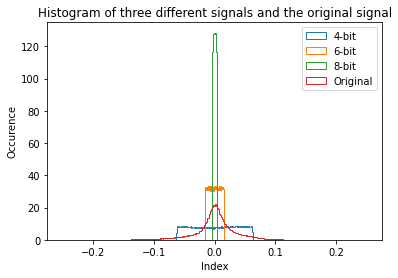

In [24]:
plt.hist(error_4,500,histtype = 'step',density = True,range = (-0.25,0.25),label = '4-bit')
plt.hist(error_6,500,histtype = 'step',density = True,range = (-0.25,0.25),label = '6-bit')
plt.hist(error_8,500,histtype = 'step',density = True,range = (-0.25,0.25),label = '8-bit')
plt.hist(data,500,histtype = 'step',density = True,range = (-0.25,0.25),label = 'Original')

plt.xlabel('Index')
plt.ylabel('Occurence')
plt.title("Histogram of three different signals and the original signal")
plt.legend()

**Task 6:** The signal is normalized to the value range [−1,1]. Set the value range of the quantizer to [−0.01,0.01]
and apply the quantization with 8 bit once more. Keep in mind that the stepsize changes accordingly. Listen to the result.

In [15]:
# your code here

#N_bit_8 = 8
#step_size_8_new = (0.01-(-0.01))/(2**N_bit_8)
#data_quantized_8_new = np.round(data_normalized/step_size_8_new)
#data_quantized_norm_8_new = 2*(data_quantized_8_new-np.min(data_quantized_8_new))/(np.max(data_quantized_8_new)-np.min(data_quantized_8_new))-1
#data_quantized_norm_8_new = 2*(data_quantized_8_new-np.min(data_quantized_8_new))/(np.max(data_quantized_8_new)-np.min(data_quantized_8_new))-1

#plt.hist(data_quantized_norm_8_new,500,range = (-1,1))
#plt.title("Histogram of Error Signal for 8-bit quantizer with range [−0.01,0.01]")
#plt.show()

data_normalized_new = data_normalized.copy()
data_normalized_new[data_normalized_new > 0.01] = 0.01
data_normalized_new[data_normalized_new < -0.01] = -0.01

#step_size_ratio = 100
data_quantized_8_new = np.round(data_normalized_new/step_size_8)*step_size_8
data_quantized_8_new = data_quantized_8_new.copy()/100

print(np.min(data_quantized_8))

default_speaker.play(data_quantized_8_new/np.max(data_quantized_8_new), samplerate = sr)


-1.0


**Task 7:** Determine the indices of the samples that are in the saturation region of the quantizer. Think about how
you can highlight these positions in a plot of the original signal and create such a plot.

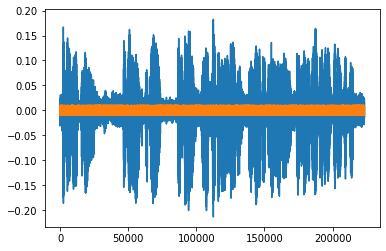

In [16]:
# your code here

#saturated_index = np.where((data < -0.01 ) | (data > 0.01))
#saturated_data = data[saturated_index]

#saturated_index = (data > np.max(data_quantized_8)) | (data < np.min(data_quantized_8))
saturated_index = (data > 0.01) | (data < -0.01)
#nonsaturated_index = np.where((data > -0.01 ) & (data < 0.01))
#nonsaturated_data = data[nonsaturated_index]
saturated_index_nonzero = np.nonzero(saturated_index)
saturated_index_zero = np.nonzero(~saturated_index)

saturated_index_zero = np.array(saturated_index_zero)
saturated_index_nonzero = np.array(saturated_index_nonzero)
data_saturated_index_zero = np.array(data[saturated_index_zero])
data_saturated_index_nonzero = np.array(data[saturated_index_nonzero])
 
#plt.stem(saturated_index_nonzero[0,:],data_saturated_index_nonzero[0,:])
#plt.stem(saturated_index_zero[0,:],data_saturated_index_zero[0,:])
#plt.show()

a = saturated_index_zero[0,:]
b = data_saturated_index_zero[0,:]

a2 = saturated_index_nonzero[0,:]
b2 = data_saturated_index_nonzero[0,:]

plt.plot(a2,b2)
plt.plot(a,b)
plt.show()

#print(len(data_saturated_index_nonzero))

#saturated_index_row = saturated_index[np.newaxis, :]
#len(saturated_index_row)
#plt.plot(saturated_index_row,saturated_data)

## 3. Signal-to-Noise-Ratio

A measure for the quality of a quantizer is the relation of the energies of the original
signal and the error signal. This so-called SNR (Signal-to-Noise-Ratio) is defined as (see script).

Compute the SNR for the four quantizers used in the previous exercise. Again, use
the speech signal speech.wav as an input signal.

In [17]:
# your code here

squared_data = np.square(data_normalized)
sum_squared_data = np.sum(squared_data)

squared_data_4 = np.square(error_4)
squared_data_6 = np.square(error_6)
squared_data_8 = np.square(error_8)
squared_data_8_new = np.square(data_quantized_8_new-data_normalized)

snr1 = 10*np.log10(sum_squared_data/np.sum(squared_data_4))
snr2 = 10*np.log10(sum_squared_data/np.sum(squared_data_6))
snr3 = 10*np.log10(sum_squared_data/np.sum(squared_data_8))
snr4 = 10*np.log10(sum_squared_data/np.sum(squared_data_8_new))

print("SNR for quantizer 1 is", snr1)
print("SNR for quantizer 2 is", snr2)
print("SNR for quantizer 3 is", snr3)
print("SNR for quantizer 4 is", snr4)
        

SNR for quantizer 1 is 14.647067550333349
SNR for quantizer 2 is 26.772672569326737
SNR for quantizer 3 is 38.816641704557306
SNR for quantizer 4 is 0.0025983709942655046


## 4. Amplitude modulation

**Task 1:** Generate a signal of length t = 1 s with a sampling rate of fs = 32 kHz. The signal should be composed of
four sine components of the frequencies 50 Hz, 110 Hz, 230 Hz and 600 Hz with the weights 1, 0.4, 0.2 and 0.05. 
Normalize the signal to the maximum amplitude 1.0, store it in a variable and display it graphically.

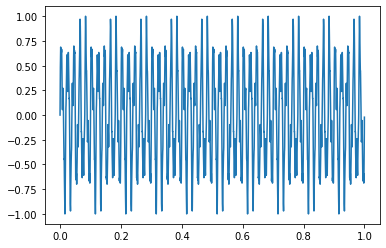

In [18]:
# your code here

sampling_freq = 32000

freq = [50, 110, 230 ,600]
amplitude = [1, 0.4, 0.2, 0.05]
#phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

#time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 
time = np.arange(0,1,1/sampling_freq) 

sine_wave  = 0
#sine_waves = []
for i,f in enumerate(freq):
    #sine_waves.append(amplitude[i] * np.sin(2*np.pi*f*time))
    #sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
    sine_wave += amplitude[i] * np.sin(2*np.pi*f*time)

sine_wave = np.array(sine_wave)

sine_wave = 2*(sine_wave-np.min(sine_wave))/(np.max(sine_wave)-np.min(sine_wave))-1
#sine_wave = (sine_wave-np.min(sine_wave))/(np.max(sine_wave)-np.min(sine_wave))

plt.plot(time,sine_wave)


**Task 2:** Generate a cosine of the same length and sampling rate with the frequency f = 12 kHz and a phase of φ0 = 0.

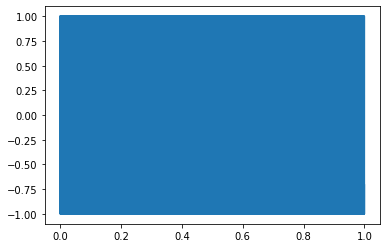

In [19]:
# your code here
phase0 = 0
f12 = 12000

time = np.arange(0,1,1/sampling_freq) 

cos_wave = 1*np.cos(2*np.pi*f12*time + phase0)
plt.plot(time,cos_wave)


**Task 3:** Perform an amplitude modulation of the signal from point 1 according to equation (1.3). Use each of the
modulation indices $m = 0.8$ and $m = 1.8$ once. Display the modulated signal, its envelope and the signal to be modulated
graphically. Use $\texttt{abs(hilbert(amsignal))}$ for the calculation of the envelope where amsignal is the modulated signal. Can
the signal be received without errors for both modulation indices? The case m > 1 is called overmodulation. Why?

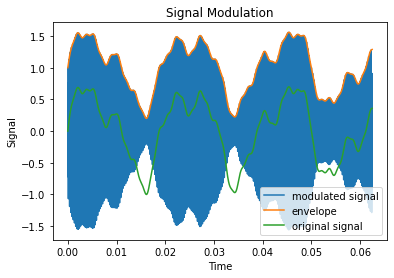

In [20]:
from scipy.signal import hilbert

# your code here
m = 0.8
#m = 1.8
amsignal = 1*(1+m*sine_wave)*cos_wave 
envelope = np.abs(hilbert(amsignal))

plt.plot(time[:2000],amsignal[:2000],label = 'modulated signal')

plt.plot(time[:2000],envelope[:2000], label = 'envelope')

plt.plot(time[:2000],sine_wave[:2000], label = 'original signal')

plt.xlabel('Time')
plt.ylabel('Signal')
plt.title("Signal Modulation")
plt.legend()
   

**Task 4:** Demodulate the signals generated in the point before. To do so, first compute the corresponding analytical
signal using the Hilbert transform (see function $\texttt{hilbert}$).Then, perform a frequency shift to the baseband by
multiplying with $e^{-\text{j}\omega t}$ in the time domain. Finally, take the absolute value of the signal, 11
subtract the direct component $\frac{1}{a_0}$ and scale it with $\frac{1}{a_0 m}$.

Keep in mind that the function $\texttt{hilbert}$ returns the analytical signal and not just the hilbert transform.

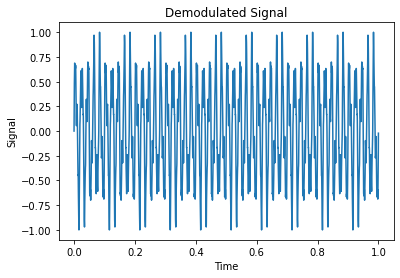

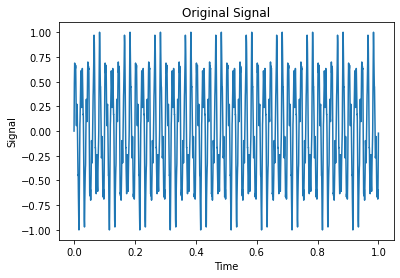

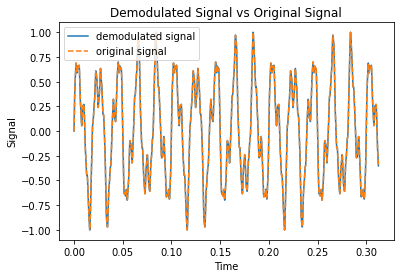

In [21]:
# your code here

asd = hilbert(amsignal)*np.exp(-1j*2*np.pi*sampling_freq*time)
amsignal_env = (np.abs(asd)-1)/m

plt.plot(time,amsignal_env)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title("Demodulated Signal")
plt.show()

plt.plot(time,sine_wave)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title("Original Signal")
plt.show()

plt.plot(time[:10000],amsignal_env[:10000],"-", label = 'demodulated signal')

plt.plot(time[:10000],sine_wave[:10000], "--", label = 'original signal')

plt.xlabel('Time')
plt.ylabel('Signal')
plt.title("Demodulated Signal vs Original Signal")
plt.legend()